In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import numpy as np
import os
from tqdm.notebook import tqdm

In [2]:
import cufflinks as cf               # third-party library for Pandas 
import plotly.graph_objs as go
%matplotlib inline
cf.go_offline()
pyo.init_notebook_mode(connected=True)
import ipywidgets as widgets
import itertools

In [3]:
file_lenght=-len(os.path.abspath(".").split("\\")[-1])
csv_path =  os.path.abspath(".")[:file_lenght]+"Data\\"

### Before we do any further analysis, we would like to clean our data first :
<p>This decision is made because of the following reasons:</p><br> 
<ul>
    <li>The Company stopped producing some products and started to focus on few</li>
    <li>The Company stopped delivering to some regions and focused only on some active regions</li>
</ul>
<p>Once this cleaning part is done, we can dig more into studying our client and their behaviours regarding the product.<br>And also their behave regarding the humidity and temperature factor </p>

In [40]:
types={       
    "PARTNERCATEGORY_CODE" : "category" 
    ,"PARTNERCATEGORYTYPE_CODE" : "category" 
    ,"VENDOR" : "category"           
    ,"SECTOR CODE" : "category"         
    ,"SECTOR NAME" : "category"       
    ,"REGION CODE" : "category"        
    ,"REGION NAME" : "category"       
    ,"PRODUCT_CODE" : "category"      
    ,"PRODUCT_NAME" : "category"       
    ,"PRODUCTPAGE_CODE" : "category"    
    ,"UNITPRICE" : "float16"
    ,"SOLD QUANTITY" : "category"  
    ,"TURNOVER" : "float64"
    ,"DISCOUNT" : "float32" 
    ,"HOLIDAY" : "category"    
    ,"SCOLAR_HOLIDAY" : "category"     
    ,"ISLAM_EVENT" : "category"    
    ,"TEMPERATURE" : "float16"
    ,"HUMIDITY" : "float16"
} # reduce memory consumption
myData = pd.read_csv(csv_path+"Updated_Data_2.csv",header=0,engine='c',index_col=[0],dtype=types)
myData=myData.drop(myData.columns[0],axis=1)
myData.head()

E:\user\anaconda\envs\Forecasting_sales\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,ITINERARY_CODE,ITINERARY_NAME,PARTNER_CODE,PARTNERCATEGORY_CODE,PARTNERCATEGORYTYPE_CODE,VENDOR,SECTOR CODE,SECTOR NAME,REGION CODE,REGION NAME,...,UNITPRICE,SOLD QUANTITY,TURNOVER,DISCOUNT,GREGORIAN_DATE,HOLIDAY,SCOLAR_HOLIDAY,ISLAM_EVENT,TEMPERATURE,HUMIDITY
0,S02001,"Samedi, Centre ville 1",02/0002,M,M,R0201,201,EURL ADEMLAIT-CHLEF,2,CHLEF,...,88.0000,12.0,1056.000000,0.0,2017-11-25,0,0,None,55.59375,0.540039
1,S02001,"Samedi, Centre ville 1",02/0004,GM,GM,R0201,201,EURL ADEMLAIT-CHLEF,2,CHLEF,...,83.3125,36.0,2999.999988,0.0,2017-11-25,0,0,None,55.59375,0.540039
2,S02001,"Samedi, Centre ville 1",02/0004,GM,GM,R0201,201,EURL ADEMLAIT-CHLEF,2,CHLEF,...,88.0000,36.0,3168.000000,0.0,2017-11-25,0,0,None,55.59375,0.540039
3,S02001,"Samedi, Centre ville 1",02/0005,M,M,R0201,201,EURL ADEMLAIT-CHLEF,2,CHLEF,...,45.0000,12.0,540.000000,0.0,2017-11-25,0,0,None,55.59375,0.540039
4,S02001,"Samedi, Centre ville 1",02/0006,M,M,R0201,201,EURL ADEMLAIT-CHLEF,2,CHLEF,...,45.0000,24.0,1080.000000,0.0,2017-11-25,0,0,None,55.59375,0.540039


In [41]:
myData.info(memory_usage='deep') #deep look

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15692870 entries, 0 to 15692869
Data columns (total 23 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   ITINERARY_CODE            object  
 1   ITINERARY_NAME            object  
 2   PARTNER_CODE              object  
 3   PARTNERCATEGORY_CODE      category
 4   PARTNERCATEGORYTYPE_CODE  category
 5   VENDOR                    category
 6   SECTOR CODE               category
 7   SECTOR NAME               category
 8   REGION CODE               category
 9   REGION NAME               category
 10  PRODUCT_CODE              category
 11  PRODUCT_NAME              category
 12  PRODUCTPAGE_CODE          category
 13  UNITPRICE                 float16 
 14  SOLD QUANTITY             category
 15  TURNOVER                  float64 
 16  DISCOUNT                  float32 
 17  GREGORIAN_DATE            object  
 18  HOLIDAY                   category
 19  SCOLAR_HOLIDAY            category
 20  

### Deleting Rows of old Products 

In [45]:
Current_C = set(myData[myData["GREGORIAN_DATE"].str.match("2018")]["PRODUCT_NAME"].tolist())
Old_C = set(myData["PRODUCT_NAME"].tolist())
Old_C

set()

### check new clients

In [53]:
Current_C = myData[myData["GREGORIAN_DATE"].str.match("2018")]

PRODUCT_NAME
BANANE 125 ML            1.007785e+08
CANDY CARAMEL 125 ML     8.009312e+07
CHOCO 125 ML             1.865349e+09
CHOCO 1L                 3.082800e+09
CHOCO 20CL               9.990026e+09
CITRONNADE               2.951632e+08
COCKTAIL 1L              4.579292e+08
COCKTAIL 20CL            2.767200e+08
DE 1L                    2.127034e+10
DE 1L SANS LACTOSE       3.488842e+07
DE 50CL                  5.402116e+08
ENTIER                   2.326173e+09
ETUI 500G                1.209976e+07
FRAISE 125 ML            1.033663e+08
FRAISE 20CL              1.316838e+08
ICE CREAM - CHOCOLAT     2.705440e+06
ICE CREAM - FRAISE       1.567680e+06
ICE CREAM - VANILLE      2.058560e+06
NECTAR DE GRENADE        1.687679e+08
ORANGE 1L                4.430580e+08
ORANGE 20CL              2.920169e+08
PREPARATION CULINAIRE    2.301562e+08
SILHOUETTE               1.388278e+09
TWIST O-A 125ML          3.791844e+07
TWIST O-A 1L             7.438596e+07
TWIST O-A 20CL           4.140090e+08

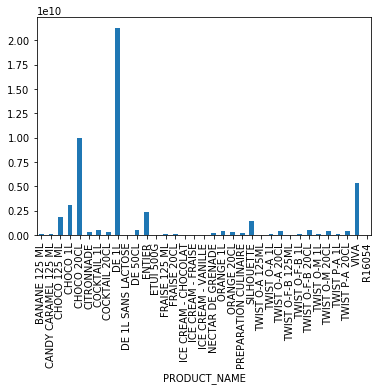

In [58]:
myData.groupby("PRODUCT_NAME")["TURNOVER"].sum().plot.bar()